In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import openpyxl
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt 
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

/home/erick_castro/anaconda3/envs/inteligencia/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
datos = pd.read_excel('/home/erick_castro/Documentos/Inteligencia/Datos.xlsx', sheet_name = "Hoja1")
datos = pd.DataFrame(datos)
datos = datos.dropna(axis = 0, how ="any")
datos.head()

,Evento,C1,Duración_(min)_pl,Intensidad_media pl,Intensidad_máxima_pl,Intensidad_continuap_pl,C_(mm_est,Duración_(min)_esta,Intensidad_media_est,Intensidad_máxima_est,...,Hs_80,Hs_100,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,Qmax,Trespuesta_(min)_plub,Trespuesta_est,Q_inicial
0,Evento 1,16.382445,55,17.871758,399.148547,27.132184,12.66,55,13.810909,93.850,...,0.535343,0.503777,16.382445,13.0,19.460113,13.4,17.246332,105.0,100.0,6.854821
1,Evento 2,15.827108,35,27.132184,312.330000,27.132184,14.80,40,22.200000,84.375,...,0.540182,0.506062,56.089048,50.2,56.089048,50.2,20.280403,115.0,125.0,7.080917
2,Evento 3,54.700705,1125,2.917371,138.830000,11.285883,47.00,1125,2.506667,109.375,...,0.552282,0.514057,56.089048,50.2,56.089048,50.2,30.667560,105.0,105.0,7.092906
3,Evento 4,13.883428,105,7.933387,86.771423,7.933387,12.40,95,7.831579,28.125,...,0.572852,0.534618,1.000000,0.0,0.000000,0.0,15.663358,70.0,65.0,9.328517
4,Evento 5,5.553371,60,5.553371,104.125708,8.554286,5.00,50,6.000000,21.875,...,0.598261,0.557462,23.324159,18.2,60.809413,50.8,16.910000,75.0,80.0,13.085455


In [3]:
x_expl2 = datos.drop(['Hs_5cm', 'Hs_40_cm', 'Hs_60', 'Hs_80', 'Hs_100',
                      'Duración_(min)_pl', 'Intensidad_media pl',
       'Intensidad_máxima_pl', 'Intensidad_continuap_pl',
       'Duración_(min)_esta', 'Intensidad_media_est', 'Intensidad_máxima_est',
       'Intensidad_continua_est', 'Trespuesta_(min)_plub',
       'Trespuesta_est', 'Evento'],
       axis =1)
x_expl2.head()

,C1,C_(mm_est,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,Qmax,Q_inicial
0,16.382445,12.66,16.382445,13.0,19.460113,13.4,17.246332,6.854821
1,15.827108,14.80,56.089048,50.2,56.089048,50.2,20.280403,7.080917
2,54.700705,47.00,56.089048,50.2,56.089048,50.2,30.667560,7.092906
3,13.883428,12.40,1.000000,0.0,0.000000,0.0,15.663358,9.328517
4,5.553371,5.00,23.324159,18.2,60.809413,50.8,16.910000,13.085455


In [4]:
scaler=StandardScaler()
ld=scaler.fit(x_expl2)
X_scaled=ld.transform(x_expl2)
x_columns= ['C1', 'Lluvia antecedent_24 horas_pluv',
       'Lluvia antecedent_24_horas_esta', 'Lluvia antecedent_48_horas_pluv',
       'Lluvia_antecedent_48_horas_est', 'C_(mm_est',
       'Qmax', 'Q_inicial']
X_scaled = pd.DataFrame(X_scaled, columns = x_columns)
X_scaled

,C1,Lluvia antecedent_24 horas_pluv,Lluvia antecedent_24_horas_esta,Lluvia antecedent_48_horas_pluv,Lluvia_antecedent_48_horas_est,C_(mm_est,Qmax,Q_inicial
0,0.100935,-0.025641,-0.364741,-0.428874,-0.478267,-0.659747,-0.374559,-0.963330
1,0.067956,0.102782,1.328381,1.635670,0.806639,1.067382,-0.272227,-0.927771
2,2.376518,2.035129,1.328381,1.635670,0.806639,1.067382,0.078107,-0.925886
3,-0.047472,-0.041244,-1.020661,-1.150355,-1.160908,-1.288647,-0.427949,-0.574289
4,-0.542164,-0.485324,-0.068741,-0.140282,0.972224,1.095541,-0.385903,0.016568
...,...,...,...,...,...,...,...,...
210,2.297224,3.213767,1.944062,1.791066,1.313136,1.198793,1.342182,-0.987426
211,2.237837,3.521448,1.944062,1.791066,1.313136,1.198793,1.464311,-0.987426
212,1.034052,1.930708,1.162621,0.592298,0.670274,0.185044,1.744718,-0.633032
213,4.314499,4.888901,2.927695,4.144202,2.937864,4.409000,6.358012,0.873633


In [5]:
n = 8  # número de features
pca5 = PCA(n_components= n).fit(X_scaled)
print(pd.DataFrame(pca5.components_, index = x_expl2.columns))

                                        0         1         2         3  \
C1                               0.361126  0.369686  0.382535  0.400465   
C_(mm_est                       -0.432394 -0.427705  0.160673  0.109094   
Lluvia antecedent_24 horas_pluv -0.143700 -0.167505  0.380374  0.188043   
Lluvia antecedent_24_horas_esta -0.288493 -0.136971 -0.291227  0.589775   
Lluvia antecedent_48_horas_pluv  0.099913  0.005351 -0.577501 -0.362294   
Lluvia_antecedent_48_horas_est  -0.402180 -0.248085  0.115074 -0.225767   
Qmax                            -0.637443  0.756237 -0.029827 -0.049929   
Q_inicial                       -0.026080  0.010630  0.500715 -0.509717   

                                        4         5         6         7  
C1                               0.362927  0.386973  0.365909  0.104221  
C_(mm_est                        0.345200  0.284841 -0.237195  0.579506  
Lluvia antecedent_24 horas_pluv  0.254816  0.071738 -0.413637 -0.728062  
Lluvia antecedent_24_horas_e

In [6]:
loadings = pca5.components_
n_features = pca5.n_features_
feature_names = x_expl2.columns
lo = pd.DataFrame(loadings)
lo.head(7)

,0,1,2,3,4,5,6,7
0,0.361126,0.369686,0.382535,0.400465,0.362927,0.386973,0.365909,0.104221
1,-0.432394,-0.427705,0.160673,0.109094,0.345200,0.284841,-0.237195,0.579506
2,-0.143700,-0.167505,0.380374,0.188043,0.254816,0.071738,-0.413637,-0.728062
3,-0.288493,-0.136971,-0.291227,0.589775,-0.494157,0.391880,0.203779,-0.161482
4,0.099913,0.005351,-0.577501,-0.362294,0.369828,0.585091,-0.028733,-0.212826
5,-0.402180,-0.248085,0.115074,-0.225767,0.236410,-0.149920,0.763176,-0.227351
6,-0.637443,0.756237,-0.029827,-0.049929,0.066622,-0.001494,-0.117364,0.013198


In [7]:
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]

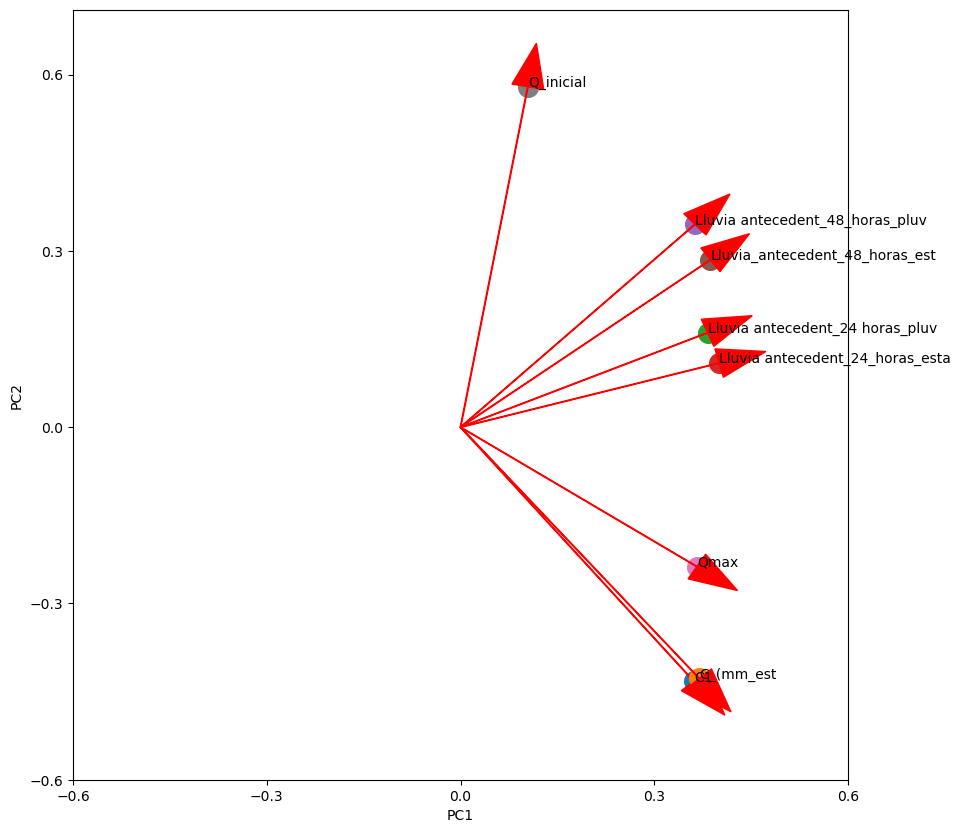

(-0.6, 0.6)

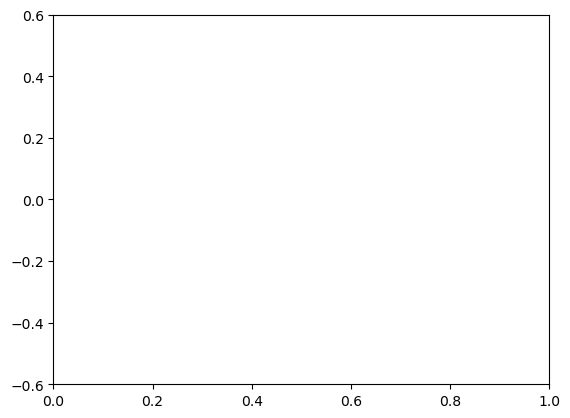

In [8]:
xs = loadings[0]
ys = loadings[1]
plt.figure(figsize = (10,10))
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.05
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.6, 0.6, num=5)
yticks = np.linspace(-0.6, 0.6, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('')
plt.show()
plt.ylim(-0.6,0.6)